# Breast Cancer Analysis with Machine Learning Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.svm import SVC

In [2]:
cancer_dataset = pd.read_csv('breast_cancer_data.csv')
cancer_dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
X_axis = cancer_dataset.iloc[:, 1:31].values
Y_axis = cancer_dataset.iloc[:, 31].values
print("Dimensions : {}".format(cancer_dataset.shape))

Dimensions : (569, 32)


In [4]:
cancer_dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

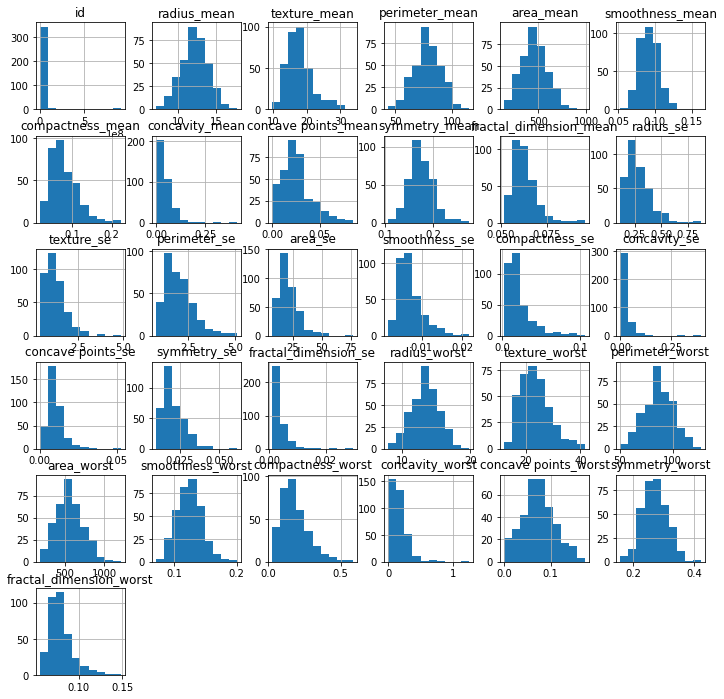

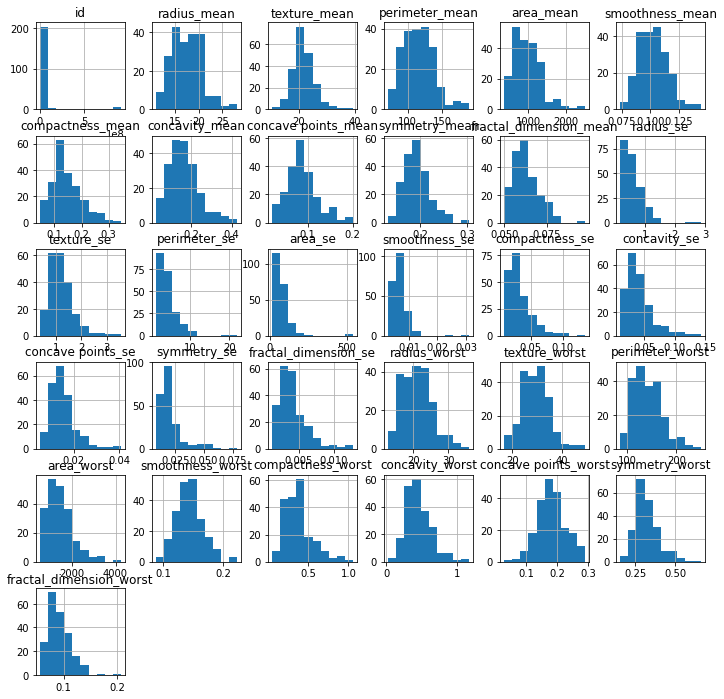

In [5]:
cancer_dataset.groupby('diagnosis').hist(figsize=(12, 12))

In [6]:
cancer_dataset.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [7]:
cancer_dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [8]:
dataframe = pd.DataFrame(Y_axis)

In [9]:
labelencoder_Y_axis = LabelEncoder()
Y_axis = labelencoder_Y_axis.fit_transform(Y_axis)

In [26]:
# Spliting the dataset into the Training set and the Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y_axis, test_size = 0.20, random_state = 0)
X_train

array([[1.005e+01, 1.753e+01, 6.441e+01, ..., 6.499e-02, 2.894e-01,
        7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, ..., 7.485e-02, 2.965e-01,
        7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
        7.012e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [11]:
#Feature Scaling
sc = StandardScaler()
#Split it so you can train and test from diffrent sets
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Fitting the logistic Regression Algorithm to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [13]:
#Predicte the test set results
Y_pred = classifier.predict(X_test)

In [14]:
#Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Accuracy of Logistic Regression:", accuracy_score(Y_test, Y_pred))

Accuracy of Logistic Regression: 0.9649122807017544


In [15]:
print("Precision of Logistic Regression:", precision_score(Y_test, Y_pred, average='weighted'))

Precision of Logistic Regression: 0.9649122807017544


In [16]:
#Fitting the Support Vector Machines Algorithm to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [17]:
#Predict the test result
Y_pred = classifier.predict(X_test)

In [18]:
#Create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Accuracy of SVC:", accuracy_score(Y_test, Y_pred))

Accuracy of SVC: 0.9824561403508771


In [19]:
print("Precision of SVC:", precision_score(Y_test, Y_pred, average='weighted'))

Precision of SVC: 0.9824561403508771


Lets use the training data as the test set and the test set as the training data

In [20]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_axis, Y_axis, test_size = 0.20, random_state = 0)

#Feature Scaling
sc = StandardScaler()
#Split it so you can train and test from diffrent sets, this is where the switch happeneds
X_train2 = sc.fit_transform(X_test2)
X_test2 = sc.transform(X_train2)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train2, Y_test2)
#predicting the Test set results
Y_pred2 = classifier2.predict(X_test2)

In [21]:
cm = confusion_matrix(Y_test2, Y_pred2)
print("Accuracy of reverse Logistic Regression:", accuracy_score(Y_test2, Y_pred2))

Accuracy of reverse Logistic Regression: 0.5789473684210527


In [22]:
print("Precision of reverse Logistic Regression:", precision_score(Y_test2, Y_pred2, average='weighted'))

Precision of reverse Logistic Regression: 0.5845823709600799


In [23]:
#Fitting the Support Vector Machines Algorithm to the Training set
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train2, Y_test2)
#predict the test ser results
Y_pred2 = classifier2.predict(X_test2)

In [24]:
cm = confusion_matrix(Y_test2, Y_pred2)
print("Accuracy of reverse SVC:",accuracy_score(Y_test2,Y_pred2))

Accuracy of reverse SVC: 0.5087719298245614


In [25]:
print("Precision of reverse SVC:", precision_score(Y_test2, Y_pred2, average='weighted'))

Precision of reverse SVC: 0.5241612803939674
